In [1]:
import os, sys
root_dir = '../'
sys.path.append(root_dir)
from config import config
from SAM.train import load_eval
from SAM import datasets, utils

In [2]:
dir_paths = os.path.join(root_dir, 'output')

V_dict = {}
V_pred_dict = {}
V_pdc_dict = {}
n_max = 50

for dir_path in os.listdir(dir_paths):
    print(dir_path)
    dir_path = os.path.join(root_dir, 'output', dir_path)
    path_param = os.path.join(dir_path, 'params/config.yml')
    cfg = config.load_config(path_param)
    config.check_device_config(cfg)

    cfg.data.n_all_per_dim = cfg.data.n_sam_per_dim
    config.check_config(cfg, save_cfg=False, check_path=False)
    dataset = datasets.get_dataset(cfg)
    potential_fn = utils.get_potential_fn(cfg)

    cfg.data.n_all_per_dim = n_max
    config.check_config(cfg, save_cfg=False, check_path=False)
    dataset_pdc = datasets.get_pdc_dataset(cfg)
    
    V_pred = load_eval(cfg, dir_path).item()
    V = potential_fn(dataset.x_all, dataset.mean).item()
    V_pdc = potential_fn(dataset_pdc.x_all, dataset_pdc.mean).item()

    params = (cfg.model.k_near, cfg.data.n_sam_per_dim)
    V_dict[params] = V
    V_pred_dict[params] = V_pred
    V_pdc_dict[params] = V_pdc

20250217_233355_N50_n5_k5_d1


c:\Users\78103\OneDrive\PC\Code Library\SAM\notebooks\..\SAM\train.py:170: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval = torch.load(eval_path)


20250217_235108_N50_n10_k5_d1
20250218_000856_N50_n15_k5_d1
20250218_002638_N50_n20_k5_d1
20250218_004410_N50_n25_k5_d1
20250218_010138_N50_n30_k5_d1
20250218_011858_N50_n35_k5_d1
20250218_013617_N50_n40_k5_d1
20250218_015336_N50_n45_k5_d1
20250218_021056_N50_n50_k5_d1
20250218_022819_N50_n5_k10_d1
20250218_024548_N50_n10_k10_d1
20250218_030319_N50_n15_k10_d1
20250218_032047_N50_n20_k10_d1
20250218_033812_N50_n25_k10_d1
20250218_035536_N50_n30_k10_d1
20250218_041301_N50_n35_k10_d1
20250218_043028_N50_n40_k10_d1
20250218_044756_N50_n45_k10_d1
20250218_050523_N50_n50_k10_d1
20250218_052256_N50_n5_k15_d1
20250218_054027_N50_n10_k15_d1
20250218_055757_N50_n15_k15_d1
20250218_061526_N50_n20_k15_d1
20250218_063258_N50_n25_k15_d1
20250218_065030_N50_n30_k15_d1
20250218_070800_N50_n35_k15_d1
20250218_072528_N50_n40_k15_d1
20250218_074302_N50_n45_k15_d1
20250218_080039_N50_n50_k15_d1
20250218_081813_N50_n5_k20_d1
20250218_083546_N50_n10_k20_d1
20250218_085323_N50_n15_k20_d1
20250218_091100_N50_

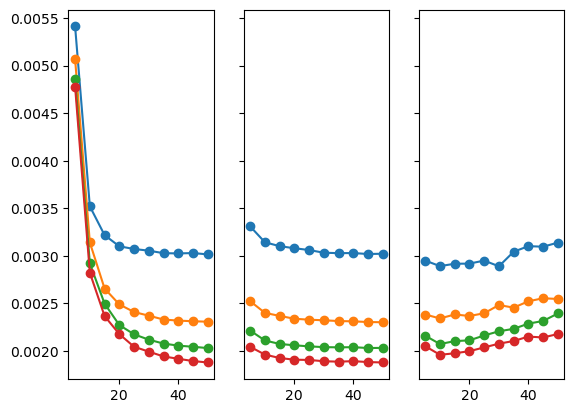

In [5]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

k_list = sorted(set(param[0] for param in V_pred_dict.keys()))
n_list = sorted(set(param[1] for param in V_pred_dict.keys()))
for k in k_list:
    V_pred_list = [V_pred_dict[(k, n)] for n in n_list]
    V_list = [V_dict[(k, n)] for n in n_list]
    V_pdc_list = [V_pdc_dict[(k, n)] for n in n_list]


    axes[0].plot(n_list, V_list, marker='o', label=f" nearest neighbors atoms")
    axes[1].plot(n_list, V_pdc_list, marker='o', label=f" nearest neighbors atoms")
    axes[2].plot(n_list, V_pred_list, marker='o', label=f" nearest neighbors atoms")